# Classification: metrics and decision theory

How could we evaluate our model if:
* we don't know real input $\boldsymbol{x}$;
* we make mistakes with dataset also (not 100% correct); 

## Setup

In [29]:
import numpy as np
import pandas as pd
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## Functions

Notes:
* block variables scope;
* ternary valuse: if-else;
* numeric python;
* array slices;
* object orientation: built-in function like sum, special function like `__iter__`,`__len__`, `__getitem__`;
* muliple return values;


In [30]:
def confusion_matrix(n):   
    TN=sum(negative_frequencies[:n]); FP=sum(negative_frequencies[n:]); TP=sum(positive_frequencies[n:]); FN=sum(positive_frequencies[:n])

    df=pd.DataFrame({ 'Normal': [TN, FN], 'Cancer': [FP, TP]}, index= ['T:Normal', 'T:Cancer'])
    
    df["condition"]=df.sum(axis=1)
    df.loc['prediction']=df.sum()
    # globals
    PN=df.loc['prediction','Normal'];PP=df.loc['prediction','Cancer'];
    return TN,FP,TP,FN,PN,PP,df

def compute_metrics():
    ACC=(TP+TN)/T;  TPR=TP/P; FPR=FP/N
    PPV= TP/PP if PP != 0 else -1
    return ACC,PPV,TPR,FPR

def draw_roc():
    fpr_values = np.arange(0.0, 1.1, 0.1)
    tpr_values = np.arange(0.0, 1.1, 0.1)
        
    for n in range(0, 11):
        TN,FP,TP,FN,PN,PP,df= confusion_matrix(n)
        fpr_values[n]= FP/N
        tpr_values[n]= TP/P

    roc_auc = auc(fpr_values, tpr_values)
    
    plt.figure()
    plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label='ROC curve (auc = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linea di riferimento
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    #plt.show()
    return plt

def draw_prob():
    fig, ax = plt.subplots()
    
    ax.bar(x_values, positive_frequencies, label='Positivi', color='red', width=0.05)
    ax.bar(x_values, negative_frequencies, bottom=positive_frequencies, label='Negativi', color='green', width=0.05)
    
    ax.set_xlabel('conditional probability')
    ax.set_ylabel('Frequency')
    ax.set_title('Classifier conditional probability')
    ax.legend()
    
    return plt

## Classificator



The clissifier should return a conditional distribution $P(C_k|\boldsymbol{x})$.

Notes:
* Returning full pdf $P(C_k,\boldsymbol{x})$;
* Returning conditional distribution $P(C_k|\boldsymbol{x})$;
* Returning class $C_k$;

<module 'matplotlib.pyplot' from '/home/nicola/miniconda3/envs/jupyter/lib/python3.10/site-packages/matplotlib/pyplot.py'>

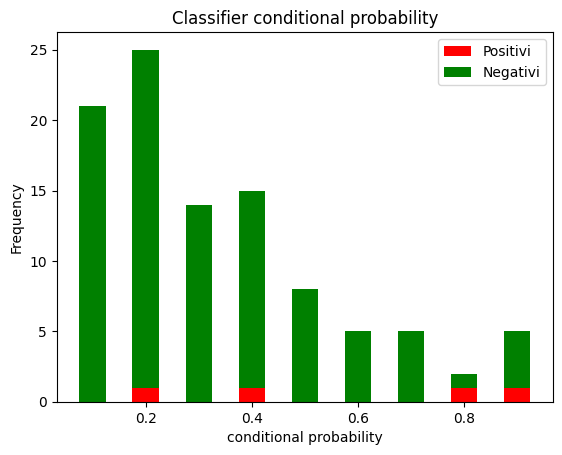

In [31]:
# Valori discreti sull'asse x
x_values =  np.arange(0.1, 1.0, 0.1)

perfect_classifier   = (np.array([31, 24, 14, 14, 8, 5, 0, 0, 0]), 
                        np.array([ 0,  0,  0,  0, 0, 0, 1, 1, 2])) 

imperfect_classifier = (np.array([31, 24, 14, 14, 8, 0, 5, 0, 0]), 
                        np.array([ 0,  0,  0,  0, 0, 1, 0, 1, 2])) 

messy_classifier     = (np.array([21, 24, 14, 14, 8, 5, 5, 1, 4]), 
                        np.array([ 0,  1,  0,  1, 0, 0, 0, 1, 1])) 

negative_frequencies, positive_frequencies = messy_classifier
N=sum(negative_frequencies); P=sum(positive_frequencies); T=N+P

draw_prob()

## Confusion matrix

Notes:
* row sums are fixed;
* columns sums change with threshold;

In [32]:
TN,FP,TP,FN,PN,PP,df= confusion_matrix(7)
ACC,PPV,TPR,FPR = compute_metrics()

print(f"Metrics: ACC:{ACC}, PPV:{PPV}, TRP:{TPR}, FPR:{FPR}\n");
print(df)

Metrics: ACC:0.93, PPV:0.2857142857142857, TRP:0.5, FPR:0.052083333333333336

            Normal  Cancer  condition
T:Normal        91       5         96
T:Cancer         2       2          4
prediction      93       7        100


![](images/totali.png)

## Metrics

### Accuracy

![](images/accuracy.png)

$ACC=\frac{TP+TN}{Total}$

Notes:
* predict always Normal has a good accuracy;


In [33]:
ACC=(TP+TN)/T
display(Latex(r'Accuracy $ACC=\frac{{TP+TN}}{{Total}}={}$'.format(ACC)))

<IPython.core.display.Latex object>

### Precision

![](images/precision.png)

$PPV=\frac{TP}{PP}=\frac{TP}{TP+FP}$

In [34]:
PPV=TP/PP
display(Latex(r'Precision $PPV=\frac{{TP}}{{PP}}={}$'.format(PPV)))

<IPython.core.display.Latex object>

### True positive rate (recall, sensitivity)
![](images/recall.png)

$TPR=SEN=\frac{TP}{P}=\frac{TP}{TP+FN}$


In [35]:
TPR=TP/P
display(Latex(r'Recall $PPV=\frac{{TP}}{{P}}={}$'.format(TPR)))

<IPython.core.display.Latex object>

### False positive rate

![](images/false-positive-rate.png)

$FPR=\frac{FP}{N}$

In [36]:
FPR=FP/N
display(Latex(r'False positive rate $FPR=\frac{{FP}}{{N}}={}$'.format(FPR)))

<IPython.core.display.Latex object>

## Decision theory

Notes:
* classificator is 

### Confutions matrices

In [37]:
for n in range(0, 11):
    TN,FP,TP,FN,PN,PP,df= confusion_matrix(n)
    ACC,PPV,TPR,FPR = compute_metrics()
    
    print(f"Threshold:{n/10} Metrics: ACC:{ACC}, PPV:{PPV}, TRP:{TPR}, FPR:{FPR}\n");
    print(df, '\n\n')
    

Threshold:0.0 Metrics: ACC:0.04, PPV:0.04, TRP:1.0, FPR:1.0

            Normal  Cancer  condition
T:Normal         0      96         96
T:Cancer         0       4          4
prediction       0     100        100 


Threshold:0.1 Metrics: ACC:0.25, PPV:0.05063291139240506, TRP:1.0, FPR:0.78125

            Normal  Cancer  condition
T:Normal        21      75         96
T:Cancer         0       4          4
prediction      21      79        100 


Threshold:0.2 Metrics: ACC:0.48, PPV:0.05555555555555555, TRP:0.75, FPR:0.53125

            Normal  Cancer  condition
T:Normal        45      51         96
T:Cancer         1       3          4
prediction      46      54        100 


Threshold:0.3 Metrics: ACC:0.62, PPV:0.075, TRP:0.75, FPR:0.3854166666666667

            Normal  Cancer  condition
T:Normal        59      37         96
T:Cancer         1       3          4
prediction      60      40        100 


Threshold:0.4 Metrics: ACC:0.75, PPV:0.08, TRP:0.5, FPR:0.23958333333333334

   

### ROC curve

Notes:
* median meaning;
* best curve;
* syntetic index;
* auc valuate the classifier;
* roc curve could be use to choice the threshold;

<module 'matplotlib.pyplot' from '/home/nicola/miniconda3/envs/jupyter/lib/python3.10/site-packages/matplotlib/pyplot.py'>

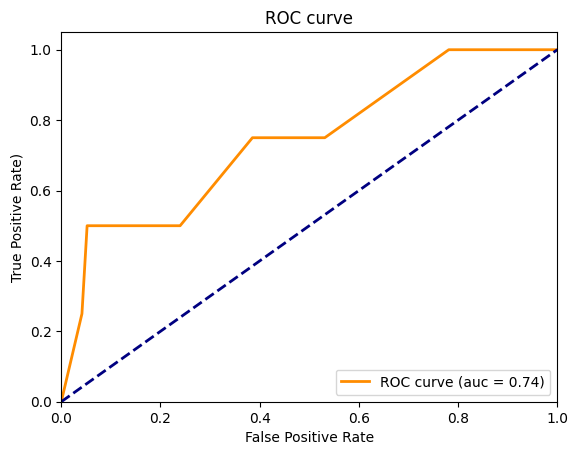

In [38]:
draw_roc()

### Threshold choice

Notes:
* decision regions;

![](images/decision-theory.png)

## References
* [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
* [Threshold Lab](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall?hl=it)
* [ROC curve](https://arogozhnikov.github.io/2015/10/05/roc-curve.html)
